<a href="https://colab.research.google.com/github/aviplane/paircreation-analysis/blob/main/ProjectionNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise

In [7]:
import matplotlib.pyplot as plt
import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

def zero(t, omega_0, delta = 0):
    omega = np.sqrt(delta**2 + omega_0**2)
    theta = omega * t
    z = (delta**2 * omega_0**2/(omega**4) * 2 * np.sin(theta/2)**4
        + omega_0**2/(2 * omega**2) * sin(theta)**2)
    return z
 
def plus(t, omega_0, delta = 0):
    omega = np.sqrt(delta**2 + omega_0**2)
    theta = omega * t
    p = omega_0 **4/omega**4 * sin(theta/2)**4
    return p

def minus(t, omega_0, delta = 0):
    return 1 - zero(t, omega_0, delta) - plus(t, omega_0, delta)

def projection_noise(t, omega, delta = 0):
    pol = plus(t, omega, delta) - minus(t, omega, delta)
    var = (plus(t, omega, delta) 
           + minus(t, omega, delta) 
           - (plus(t, omega, delta) 
           - minus(t, omega, delta))**2
          )
    return var

def power_noise(t, omega_0, delta):
    omega = np.sqrt(delta**2 + omega_0**2)
    return sin(omega * t)**2 * t**2

def counts_to_atom(atom):
    return atom/18/1.5

def polarization(t, omega, delta):
    return plus(t, omega, delta) - minus(t, omega, delta)

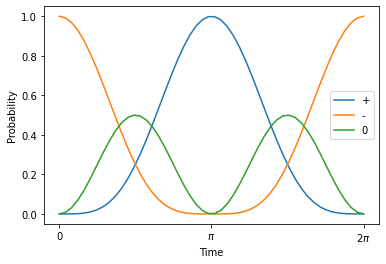

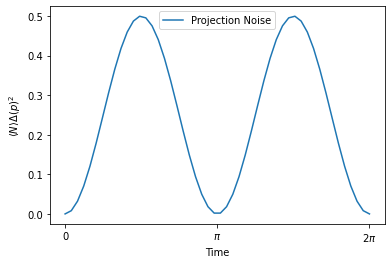

In [3]:
fig, ax = plt.subplots()
t = np.linspace(0, 2 * pi)
N = 1
omega = 1
delta = 0
ax.plot(t, plus(t, omega, delta), label = "+")
ax.plot(t, minus(t, omega, delta), label = "-")
ax.plot(t, zero(t, omega, delta), label = "0")
ax.set_xticks([0, pi, 2 * pi ])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.legend()
ax.set_ylabel("Probability")
ax.set_xlabel("Time")
fig.savefig(f"delta{delta}.png")
omega = 1
var = projection_noise(t, omega, delta)
omega_var = power_noise(t, omega, delta)
fig, ax = plt.subplots()
ax.plot(t, var/N, label = "Projection Noise")
#ax.plot(t, omega_var/N, label = "Power Noise")
ax.legend()

ax.set_xticks([0, pi, 2 * pi ])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])
ax.legend()
ax.set_ylabel(r"$\langle N\rangle \Delta(p)^2$")
ax.set_xlabel("Time")
fig.savefig(f"varp{delta}.png")


In [4]:
from google.colab import drive
drive.mount('/gdrive', force_remount= True)
drive_location = '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/'
import os

Mounted at /gdrive


In [5]:
!pip install colorcet

     |████████████████████████████████| 1.6MB 7.0MB/s 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from colorcet import cm
from datetime import date
from scipy.optimize import curve_fit
import matplotlib.animation as animation

from matplotlib import rcParams
import matplotlib as mpl
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['axes.grid'] = True
###Some notes
### alpha > 0 preferred to dashed lines
magnetization_colormap = cm.coolwarm
phase_colormap = "hsv"
contrast_colormap = cm.fire
correlation_colormap = cm.coolwarm
labelsize = 13

def transparent_edge_plot(ax, x, y, yerr = None , marker = 'o', ms = 12, **kwargs):
    if yerr is not None:
        base,_,_ = ax.errorbar(x, y, yerr, ms = ms, marker = marker, linestyle ="None", alpha =0.6, markeredgewidth = 2, **kwargs)
    else:
        base, = ax.plot(x, y, ms = ms, marker = marker, linestyle ="None", alpha =0.5, markeredgewidth = 2, **kwargs)
    ax.plot(x, y, ms =ms, marker =marker, linestyle ="None", markeredgecolor = base.get_color(), markerfacecolor ="None", markeredgewidth =2)
    return ax

# Data analysis

## Raman

### Rabi Oscillations

In [ ]:

def total_noise(t, omega, delta, omega_noise):
    power_var = power_noise(t, omega, delta)
    projection_var = projection_noise(t, omega, delta)
    return projection_var +  omega_noise * power_var


['/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration20.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration90.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration100.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration70.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration80.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration30.0us_174734/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_ProjectionNoise/raman/rabi_osc/set3/iteration_BigRamanDuration40.0us_174734/', '/gdrive/Shared drives/Ca

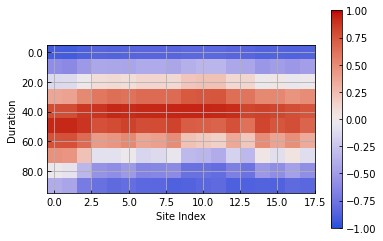

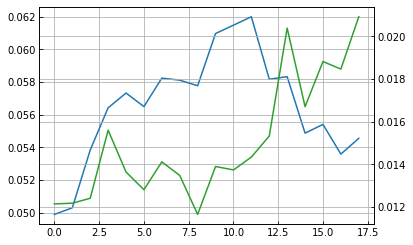

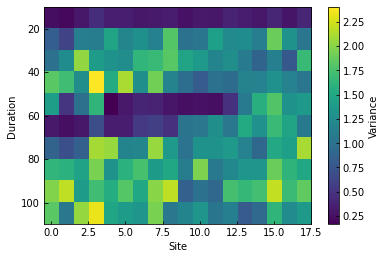

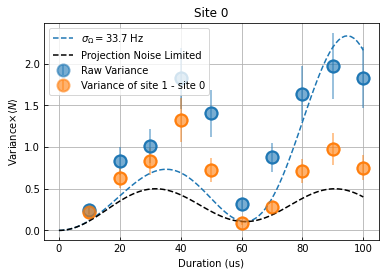

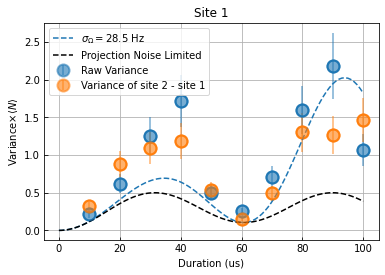

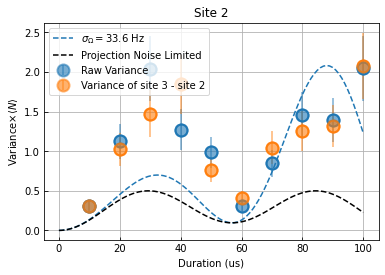

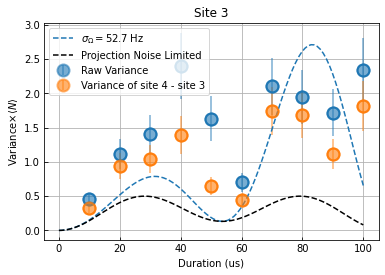

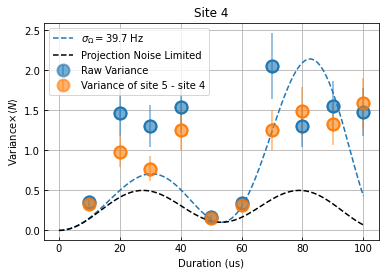

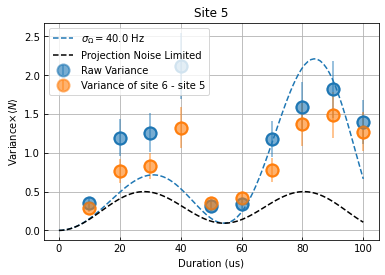

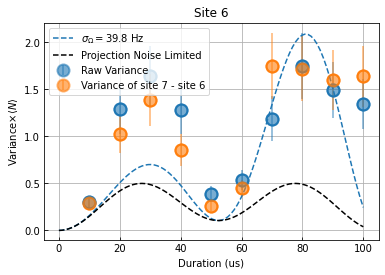

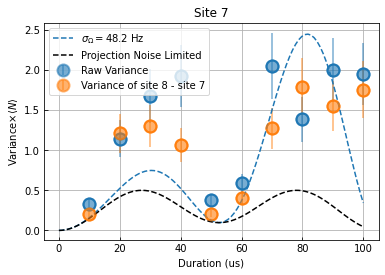

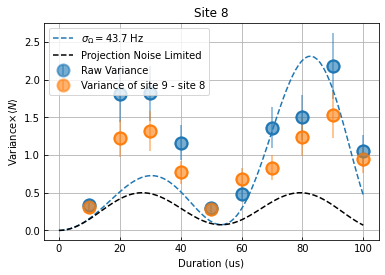

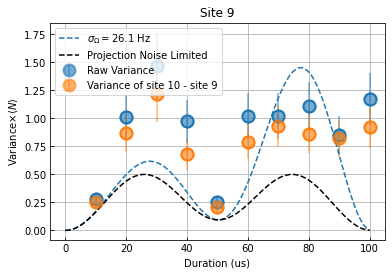

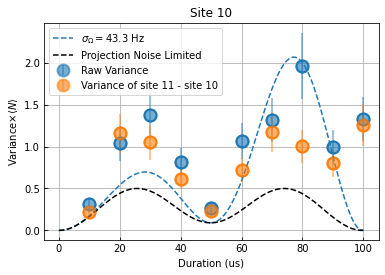

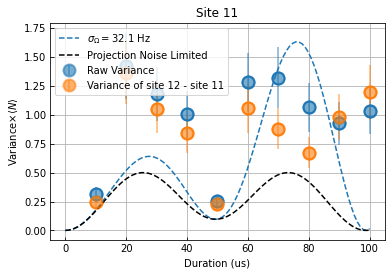

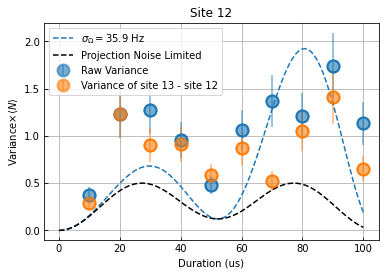

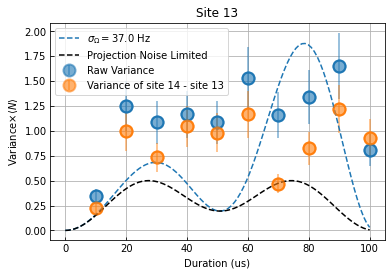

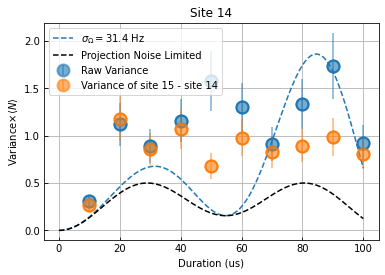

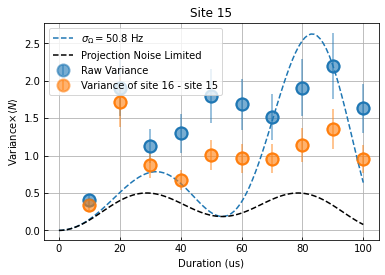

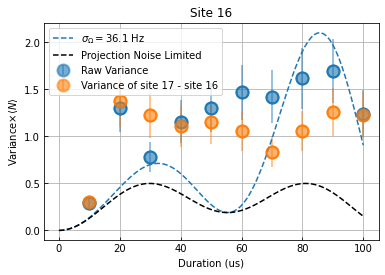

In [ ]:
import numpy as np
import glob

folders = glob.glob(f"{drive_location}raman/rabi_osc/set3/*/")
print(folders)
def get_statistics(directory):
   
    fits = np.load(f"{directory}/all_fits.npy")
    labels = list(np.load(f"{directory}/roi_labels.npy"))
   
    ### fits has shape shots X roi X site
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
   
    polarization = (p - m)/(m + p + z)
    #polarization is shots X site
    
    polarization_var = np.var(polarization, axis = 0)
    
    polarization_diff = np.diff(polarization, n = 1, axis = 1)
   
    polarization_diff_var = np.var(polarization_diff, axis = 0)/2
   
    polarization_adj = np.diff(polarization, axis = 0)
    polarization_adj_var = np.var(polarization_adj, axis = 0)/2

    atom = np.mean(counts_to_atom(m + p + z), axis = 0)
    atom_adj = (atom[1:] + atom[:-1])/2
    return atom * polarization_var, atom_adj * polarization_diff_var, atom * polarization_adj_var


def get_duration(folder):
    s = folder.split("Duration")[-1]
    t = s.split("us")[0]
    return float(t)

def get_rabi_fit(folders):
    def load_dir(directory):
        fits = np.load(f"{directory}/all_fits.npy")
        labels = list(np.load(f"{directory}/roi_labels.npy"))
    
        ### fits has shape shots X roi X site
        m = fits[:, labels.index("roi1-1")]
        p = fits[:, labels.index("roi11")]
        z = fits[:, labels.index("roi10")]
        all = np.array([m, p, z])
        all = np.mean(all, axis = 1)
        return all

    durations = np.array([get_duration(folder) for folder in folders])
    order = np.argsort(durations)
    durations = durations[order]
    folders = np.array(folders)[order]
    values = np.array([load_dir(directory) for directory in folders])
    total = np.sum(values, axis = 1)
    pol = (values[:, 1] - values[:, 0])/total
    fig, ax = plt.subplots()
    cax = ax.imshow(pol, cmap = cm.coolwarm, vmin = -1, vmax = 1)
    ax.set_xlabel("Site Index")
    ax.set_ylabel("Duration")
    fig.colorbar(cax)
    yt = ax.get_yticks()
    ax.set_yticklabels(yt * np.max(durations)/np.max(yt))
    fig.savefig("example_pol.png", dpi = 200)
    def rabi_params(t, pol, plot = False):
        guess = [0.05, 0.001]
        if plot:
            fig, ax = plt.subplots()
            ax.plot(t, pol, 'o')
            ax.plot(t, polarization(t, *guess))
        popt, _ = curve_fit(polarization, t, pol, p0 = guess)
        if plot:
            ax.plot(t, polarization(t, *popt))
        return popt
    
    omegas, deltas = zip(*[rabi_params(durations, pol[:, i], plot = False) for i in np.arange(pol.shape[1])])
    deltas = np.abs(deltas)
    fig, ax = plt.subplots()
    ax.plot(omegas)
    ax1 = ax.twinx()
    ax1.plot(deltas, c = "tab:green")
    return np.array(omegas), np.array(deltas)


    
durations = np.array([get_duration(folder) for folder in folders])

order = np.argsort(durations)
var, diff_var, adj_var = zip(*[get_statistics(folder) for folder in folders])
omega, delta = get_rabi_fit(folders)
var = np.array(var)[order]
diff_var = np.array(diff_var)[order]
adj_var = np.array(adj_var)[order]
durations = durations[order]
print(durations)

extent = [-0.5, 17.5, np.max(durations) + np.mean(np.diff(durations)), np.min(durations)]
fig, ax = plt.subplots()
cax = ax.imshow(var, extent = extent, aspect = "auto")
fig.colorbar(cax, ax = ax, label = "Variance")
ax.set_xlabel("Site")
ax.set_ylabel("Duration")
ax.grid(False)
fig.savefig(f"{folders[0]}/std_dev_2d.png", dpi = 200)

for site in np.arange(var.shape[1] - 1):
    fig, ax = plt.subplots()
    ax.set_title(f"Site {site}")
    durations_fine = np.linspace(0, np.max(durations),100)
    transparent_edge_plot(ax, durations, var[:, site], var[:, site] * np.sqrt(2/50), label = "Raw Variance")
    transparent_edge_plot(ax, durations, diff_var[:, site], diff_var[:, site] * np.sqrt(2/50), label = f"Variance of site {site + 1} - site {site}", c= "tab:orange")
    ax.set_xlabel("Duration (us)")
    ax.set_ylabel(r"Variance$\times\langle N\rangle$")
    noise_func = lambda t, omega_noise: total_noise(t, omega[site], delta[site], omega_noise)
    popt, _ = curve_fit(noise_func, durations, var[:, site])
    popt_adj, _ = curve_fit(noise_func, durations, adj_var[:, site])

    #ax.plot(durations, polarization(durations, omega[site], delta[site]))
    ax.plot(durations_fine, noise_func(durations_fine, *popt), 
            label = f"$\sigma_\Omega = {popt[0]/(2 * pi) * 1e6:.1f}$ Hz", 
            ls = "--", 
            c = "tab:blue")
    ax.plot(durations_fine, projection_noise(durations_fine, omega[site], delta[site]), 
            ls = "--", 
            c = "k", label = "Projection Noise Limited")
    ax.legend()
    fig.savefig(f"raman_extra_pos_{site}.png", dpi = 200)

### Var(polarization)

Big Raman - rabi_osc

Small Raman sequential - 2020-11-20-rabi_osc

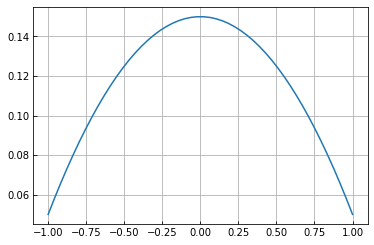

In [ ]:
import numpy as np
import glob
def get_statistics(directory, normalized = False):
   
    fits = np.load(f"{directory}/all_fits.npy")
    labels = list(np.load(f"{directory}/roi_labels.npy"))
   
    ### fits has shape shots X roi X site
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
   
    polarization = (p - m)/(m + p + z)
    #polarization is shots X site
    mean_polarization = np.mean(polarization, axis = 0)

    polarization_var = np.var(polarization, axis = 0)
    
    polarization_diff = np.diff(polarization, n = 1, axis = 1)
   
    polarization_diff_var = np.var(polarization_diff, axis = 0)/2
   
    polarization_adj = np.diff(polarization, axis = 0)
    polarization_adj_var = np.var(polarization_adj, axis = 0)/2

    if normalized:
        atom = np.mean(counts_to_atom(m + p + z), axis = 0)
        atom_adj = (atom[1:] + atom[:-1])/2

        return polarization, atom * polarization_var, atom_adj * polarization_diff_var, atom * polarization_adj_var
    return polarization, polarization_var, polarization_diff_var, polarization_adj_var



def get_duration(folder):
    s = folder.split("Duration")[-1]
    t = s.split("us")[0]
    return float(t)

def variance_func(polarization, N, omega_sigma, transfer_variance):
    projection_noise = 1/(2 * N) * (1 - polarization**2)
    transfer_noise = polarization ** 2 * transfer_variance
    theta_noise = 4 * (1 - polarization**2) * omega_sigma**2 * np.arccos(-polarization)**2
    return projection_noise + theta_noise + transfer_variance

import matplotlib.pyplot as plt

pol = np.linspace(-1, 1)
fig, ax = plt.subplots()
#ax.plot(pol, 1/(2) * (1 - pol**2))
ax.plot(pol, variance_func(pol, 5, 0, 0.05))

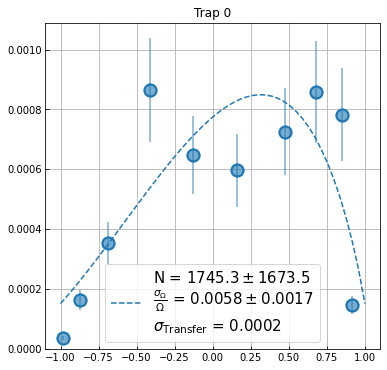

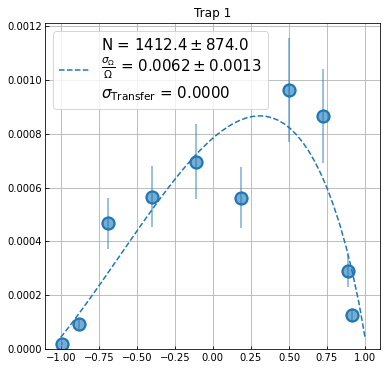

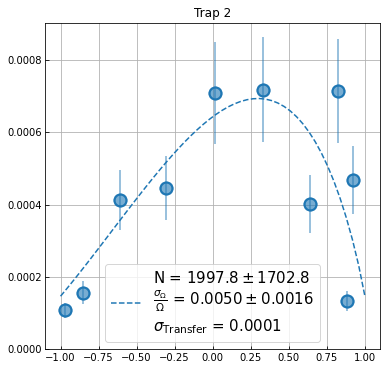

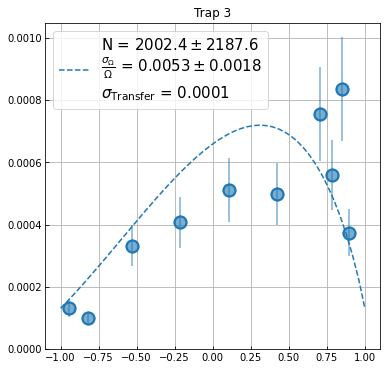

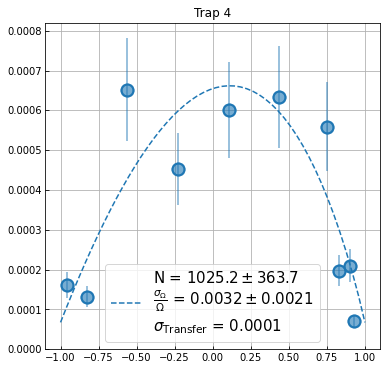

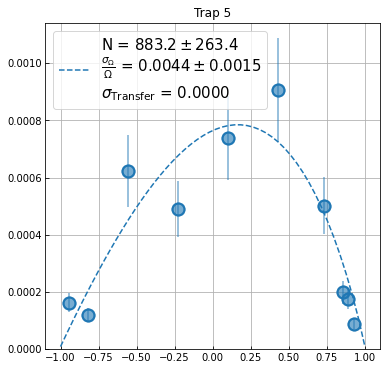

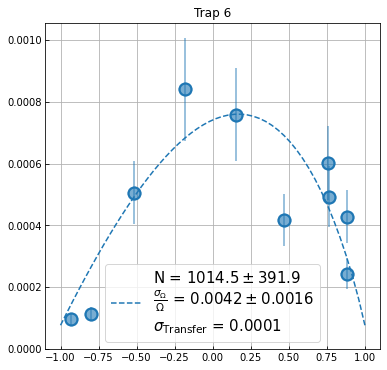

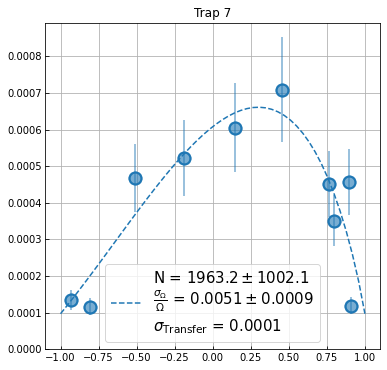

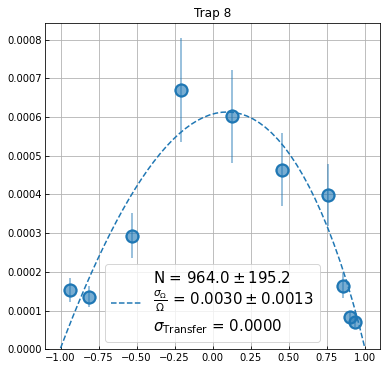

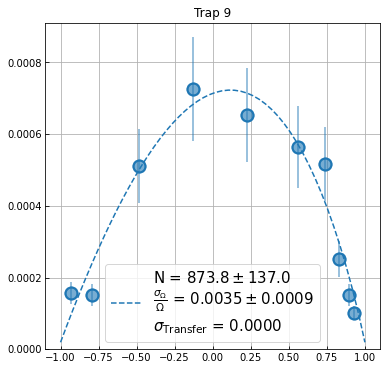

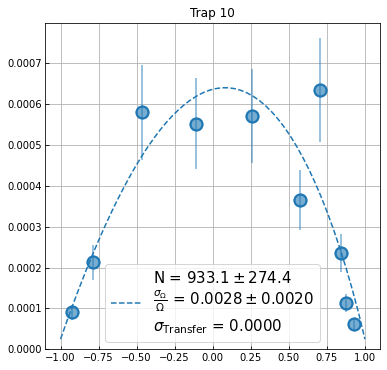

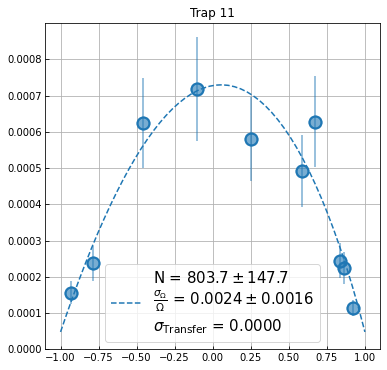

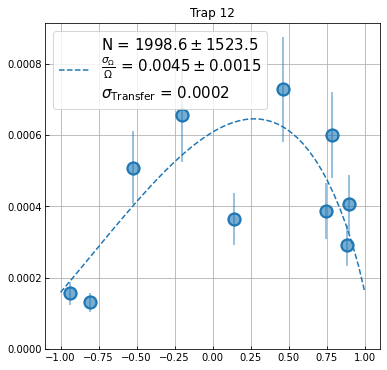

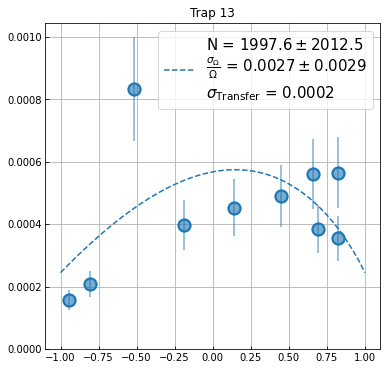

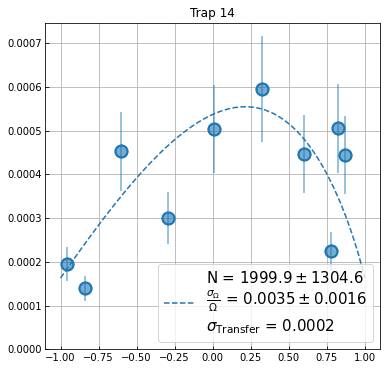

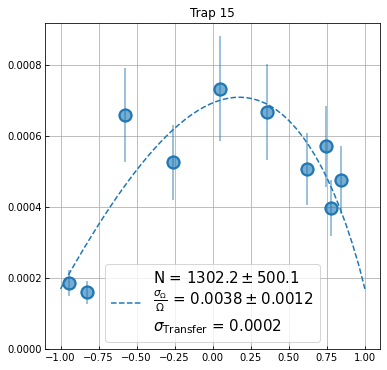

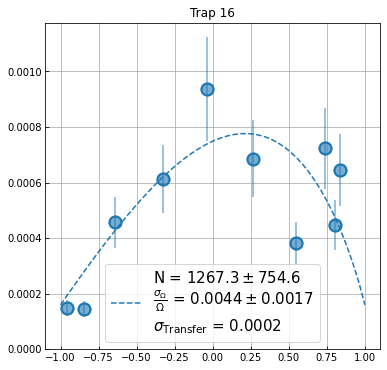

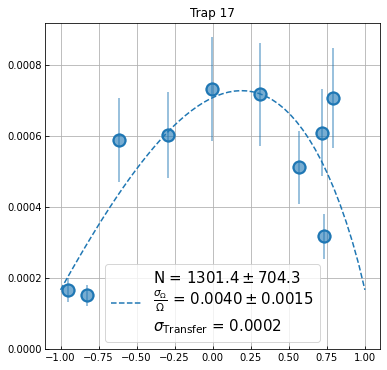

In [ ]:
folders = glob.glob(f"{drive_location}raman/rabi_osc/set1/*/")[:-1]

polarizations, polarization_vars, _, _ = zip(*[get_statistics(folder) for folder in folders])
n_shots = np.array([p.shape[0] for p in polarizations])
durations = np.array([get_duration(i) for i in folders])
polarizations = np.array([np.mean(p, axis = 0) for p in polarizations])
polarizations = np.array(polarizations)
polarization_vars = np.array(polarization_vars)
polarization_vars_sev = polarization_vars * np.sqrt(2/n_shots[:, np.newaxis])
_, n_traps = polarizations.shape
#print(polarization_vars[:, i])
#print(durations)
for i in np.arange(n_traps):
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
    ax.set_title(f"Trap {i}")
    transparent_edge_plot(ax, 
                          polarizations[:, i], 
                          polarization_vars[:, i],
                          polarization_vars_sev[:, i])
    ax.set_ylim(0, None)
    p0 = [2000, 0, 0]
    popt, pcov = curve_fit(
        variance_func, 
        polarizations[:, i], 
        polarization_vars[:, i], 
        p0 = p0,
        bounds = ([0, 0, 0], [np.inf, 1, 1]))
    pol = np.linspace(-1, 1)
    ax.plot(pol, variance_func(pol, *popt), ls = "--", c= "tab:blue", 
            label = f"N = ${popt[0]:.1f}\pm {np.sqrt(pcov[0, 0]):.1f}$\n"+ 
                    r"$\frac{\sigma_{\Omega}}{\Omega}$ = "+f"${popt[1]:.4f}\pm {np.sqrt(pcov[1, 1]):.4f}$\n"
                    +r"$\sigma_{\mathrm{Transfer}}$" + f" = {popt[2]:.4f}")
    ax.legend(fontsize = labelsize + 2, loc = "best")
    # transparent_edge_plot(ax[1],
    #                       durations,
    #                       polarizations[:, i])

### $N\pi/2$ multiples

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


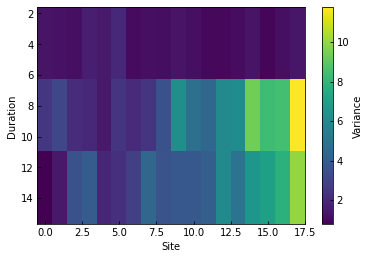

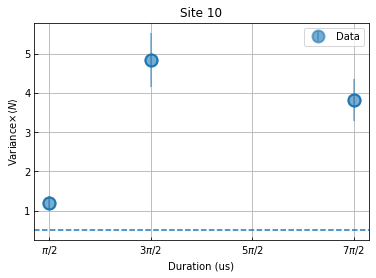

In [ ]:
folders = glob.glob(f"{drive_location}raman/2020-11-03-pi-half-multiples/*/")

def get_duration(folder):
    s = folder.split("Duration")[-1]
    t = s.split("us")[0]
    return float(t)

durations = np.array([get_duration(folder) for folder in folders])
order = np.argsort(durations)
var, diff_var, adj_var = zip(*[get_statistics(folder) for folder in folders])
var = np.array(var)[order]
diff_var = np.array(diff_var)[order]
adj_var = np.array(adj_var)[order]
durations = durations[order]
durations = durations/np.min(durations) * pi/2

extent = [-0.5, 17.5, np.max(durations) + np.mean(np.diff(durations)), np.min(durations)]
fig, ax = plt.subplots()
cax = ax.imshow(var, extent = extent, aspect = "auto")
fig.colorbar(cax, ax = ax, label = "Variance")
ax.set_xlabel("Site")
ax.set_ylabel("Duration")
ax.grid(False)
fig.savefig(f"{folders[0]}/std_dev_2d.png", dpi = 200)
site = 10
# for site in np.arange(var.shape[1]):
fig, ax = plt.subplots()
ax.set_title(f"Site {site}")
durations_fine = np.linspace(np.min(durations), np.max(durations))
transparent_edge_plot(ax, durations, var[:, site], var[:, site] * np.sqrt(1/50), label = "Data")
ax.set_xlabel("Duration (us)")
ax.set_ylabel(r"Variance$\times\langle N\rangle$")
ax.set_xticks([pi/2, 3 * pi/2, 5 * pi/2, 7 * pi/2])
ax.set_xticklabels([r"$\pi/2$", r"$3\pi/2$", "$5\pi/2$",  "$7\pi/2$"])

popt, _ = curve_fit(total_noise, durations, var[:, site])
# ax.plot(durations_fine, total_noise(durations_fine, *popt), 
#         label = f"N = {popt[0]:.0f}, $\sigma_\Omega = {popt[1]/(2 * pi) * 1e6:.1f}$ Hz", 
#         ls = "--", 
#         c = "tab:blue")
# ax.plot(durations_fine, projection_noise(durations_fine, omega), 
#         ls = "--", 
#         c = "k", label = "Projection Noise Limited")
ax.legend()
ax.axhline(0.5, label = "Projection Noise Limited", ls = '--')
fig.savefig("raman_variance.png", dpi = 200)

### Pi/2  vs Atom number from warmup

locations

* raman/2020-11-20-pi-half-10/reps__103347 - starting from $|1, 0\rangle$
* atom_number/pi_half_10/iteration__155125


In [ ]:
def load_fits(folder, threshold_f2 = False, atom_number = False):
    fits = np.load(f"{folder}/all_fits.npy")
    labels = list(np.load(f"{folder}/roi_labels.npy"))
    if atom_number:
        fits = counts_to_atom(fits)
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
    return m, p, z

def se_variance(lst):
    return np.sqrt(2/(np.fromiter(map(len, lst), dtype = float)))

0.49575313007068583 0.3767010032120341 0.12754586671728016
[           nan   215.52654153   353.48341158   422.98686081
   595.29988971   762.53983447  1149.51281805  1564.9632073
  1904.65598583  1732.24771773  2049.55112903  2423.49059432
  3365.18455059  3840.2506355   3386.08999517  4475.37355162
  3653.7865138   5080.74875392  5257.70830634  6839.93940527
  6338.42720192  6001.6622251   6432.59974779  6809.01014456
  8414.04266405  9721.09841283 10478.94882053 11703.28347522
 11781.48370322 11047.09896381 14509.20787202 13064.16989167
 15135.53113383 13110.61526612 11964.13604909 12050.86016606
 13601.73446498 12960.48895086 14818.73407445 15110.25055525
 15470.57383376]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


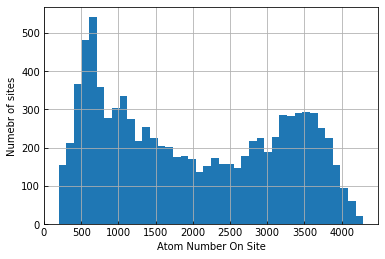

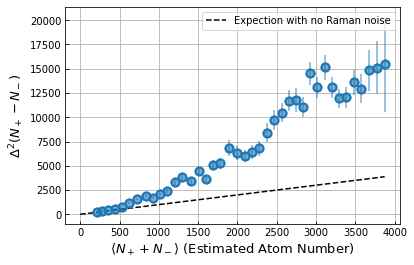

In [ ]:
folder = f"{drive_location}atom_number/pi_half_10/iteration__155125"
m, p, z = load_fits(folder, atom_number = True)
m, p, z = m.ravel(), p.ravel(), z.ravel()
t = m + p + z
pol = p - m
s = m + p

print(np.mean(m/t), np.mean(p/t), np.mean(z/t))

fig, ax = plt.subplots()
_, bins, _ = ax.hist(t, bins = 40)
ax.set_xlabel("Atom Number On Site")
ax.set_ylabel("Numebr of sites")

bin_indices = np.digitize(t, bins)

pol_sorted = [pol[bin_indices == i] for i in np.arange(len(bins))]
p_sorted = [p[bin_indices == i] for i in np.arange(len(bins))]
s_sorted = [s[bin_indices == i] for i in np.arange(len(bins))]
t_sorted = [t[bin_indices == i] for i in np.arange(len(bins))]


pol_variance = np.fromiter(map(np.var, pol_sorted), dtype = float)#/np.fromiter(map(np.mean, t_sorted), dtype = float)
print(pol_variance)
pol_variance_se = pol_variance * se_variance(pol_sorted) 

p_means = np.fromiter(map(np.mean, p_sorted), dtype = float)
s_means = np.fromiter(map(np.mean, s_sorted), dtype = float)

fig, ax = plt.subplots()
ax.plot([0, np.nanmax(s_means)], [0, np.nanmax(s_means)], ls = "--", c = "k",
         label = "Expection with no Raman noise")
transparent_edge_plot(ax, s_means, pol_variance, pol_variance_se, ms = 8)
ax.set_xlabel(r"$\langle N_+ + N_-\rangle$ (Estimated Atom Number)", fontsize = labelsize)
ax.set_ylabel(r"$\Delta^2(N_+ - N_-)$", fontsize = labelsize)
ax.legend()



### $\pi/2$ vs atom number load amplitude

## Microwaves

### 1, -1 -> 2, 0

(100, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
(100, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
(113, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
[1.57079633 4.71238898 7.85398163]


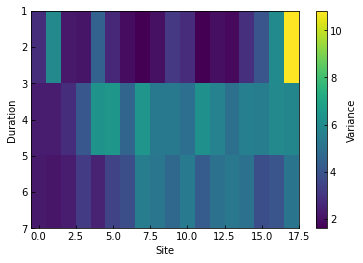

In [ ]:
folders = glob.glob(f"{drive_location}microwave/2020-11-03-pi-half-multiples-1m1-20/*/")

def get_statistics(directory):
   
    fits = np.load(f"{directory}/all_fits.npy")
    labels = list(np.load(f"{directory}/roi_labels.npy"))
   
    print(fits.shape, labels)
    ### fits has shape shots X roi X site
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
    f2 = fits[:, labels.index("roi2orOther")]
    f1 = m + p + z

    polarization = (f2 - f1)/(f2 + f1)
    polarization_var = np.var(polarization, axis = 0)
    
    polarization_diff = np.diff(polarization, n = 1, axis = 1)
   
    polarization_diff_var = np.var(polarization_diff, axis = 0)/2
   
    polarization_adj = np.diff(polarization, axis = 0)
    polarization_adj_var = np.var(polarization_adj, axis = 0)/2

    atom = np.mean(counts_to_atom(f2 + f1), axis = 0)
    atom_adj = (atom[1:] + atom[:-1])/2
    return atom * polarization_var, atom_adj * polarization_diff_var, atom * polarization_adj_var

def get_duration(folder):
    s = folder.split("Duration")[-1]
    t = s.split("ms")[0]
    return float(t) * 1000

durations = np.array([get_duration(folder) for folder in folders])
order = np.argsort(durations)
var_m1, diff_var_m1, adj_var_m1 = zip(*[get_statistics(folder) for folder in folders])
var_m1 = np.array(var_m1)[order]
diff_var_m1 = np.array(diff_var_m1)[order]
adj_var_m1 = np.array(adj_var_m1)[order]
durations = durations[order]
durations = durations/np.min(durations)
durations_m1 = durations * pi/2

print(durations_m1)

extent = [-0.5, 17.5, np.max(durations) + np.mean(np.diff(durations)), np.min(durations)]
fig, ax = plt.subplots()
cax = ax.imshow(var_m1, extent = extent, aspect = "auto")
fig.colorbar(cax, ax = ax, label = "Variance")
ax.set_xlabel("Site")
ax.set_ylabel("Duration")
ax.grid(False)
fig.savefig(f"{folders[0]}/std_dev_2d.png", dpi = 200)

### 1, 0 -> 2, 0

TweezerSweepDuration_TweezerSweepDuration0.0585ms_143155
TweezerSweepDuration_TweezerSweepDuration0.0975ms_143155
TweezerSweepDuration_TweezerSweepDuration0.0195ms_143155
(100, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
(100, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
(104, 6, 18) ['roi1-1', 'roi10', 'roi11', 'roi2orOther', 'roiRemaining', 'roiSum']
[1.57079633 4.71238898 7.85398163]


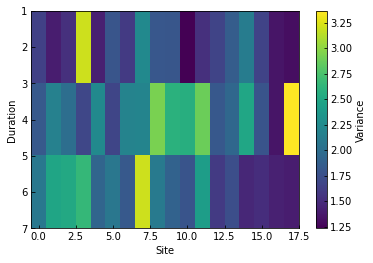

In [ ]:
folders = glob.glob(f"{drive_location}microwave/2020-11-03-pi-half-multiples-10-20/*/")[3:]
for i in folders:
    print(i.split("/")[-2])
durations = np.array([get_duration(folder) for folder in folders])
order = np.argsort(durations)
var_0, diff_var_0, adj_var_0 = zip(*[get_statistics(folder) for folder in folders])
var_0 = np.array(var_0)[order]
diff_var_0 = np.array(diff_var_0)[order]
adj_var_0 = np.array(adj_var_0)[order]
durations = durations[order]
durations = durations/np.min(durations)
durations_0 = durations * pi/2
print(durations_0)

extent = [-0.5, 17.5, np.max(durations) + np.mean(np.diff(durations)), np.min(durations)]
fig, ax = plt.subplots()
cax = ax.imshow(var_0, extent = extent, aspect = "auto")
fig.colorbar(cax, ax = ax, label = "Variance")
ax.set_xlabel("Site")
ax.set_ylabel("Duration")
ax.grid(False)
fig.savefig(f"{folders[0]}/std_dev_2d.png", dpi = 200)

### Plotted together

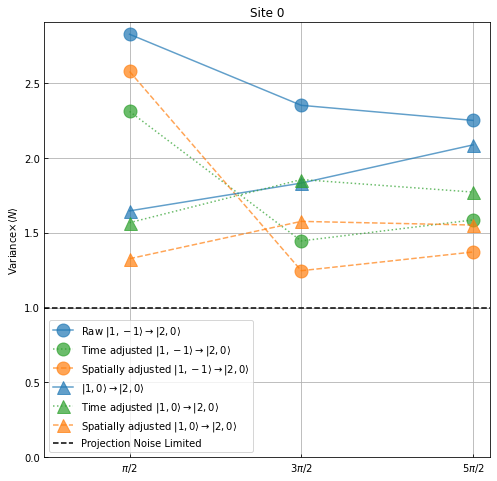

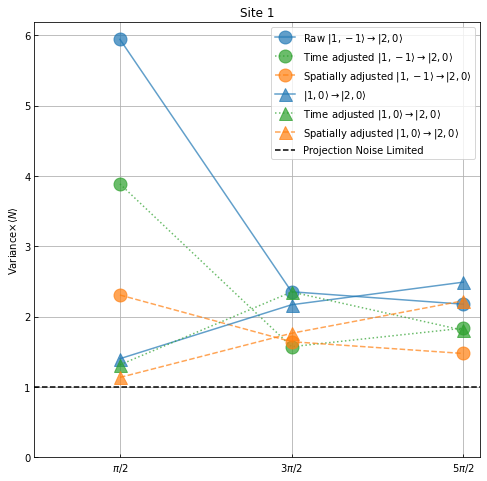

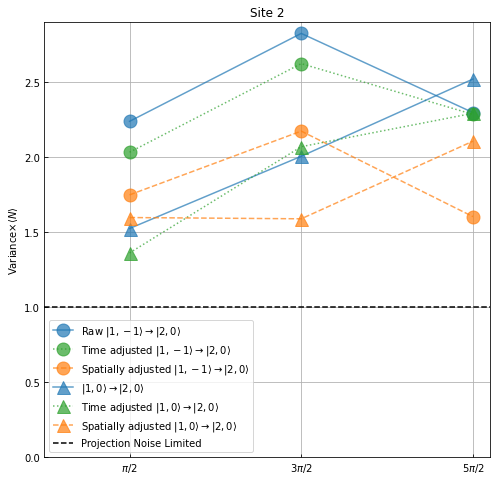

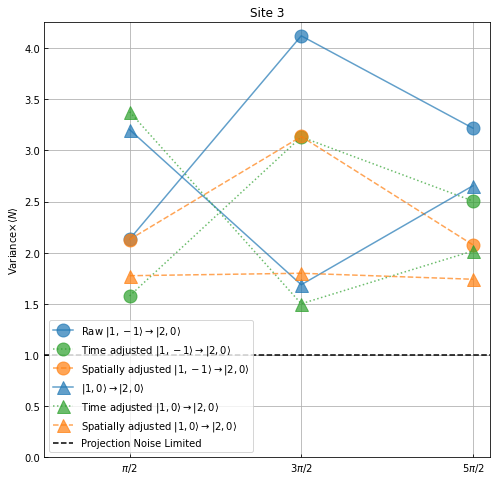

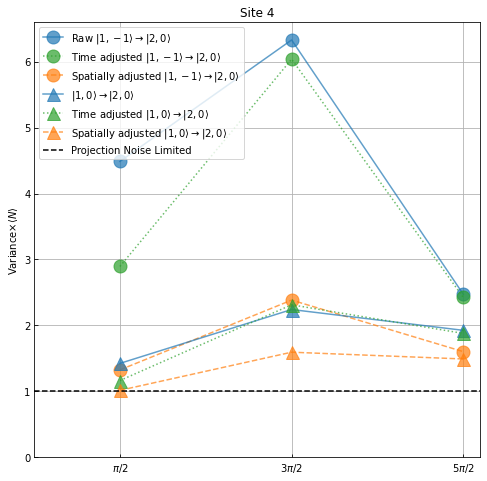

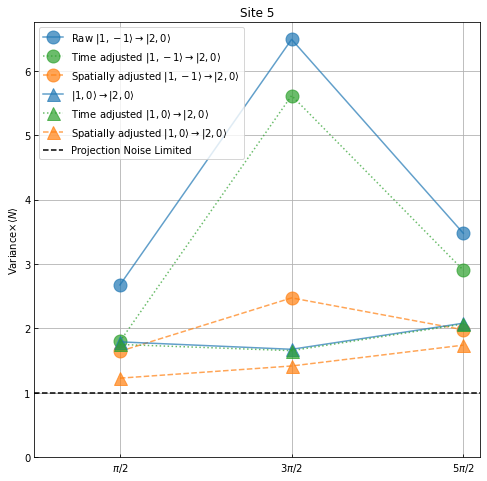

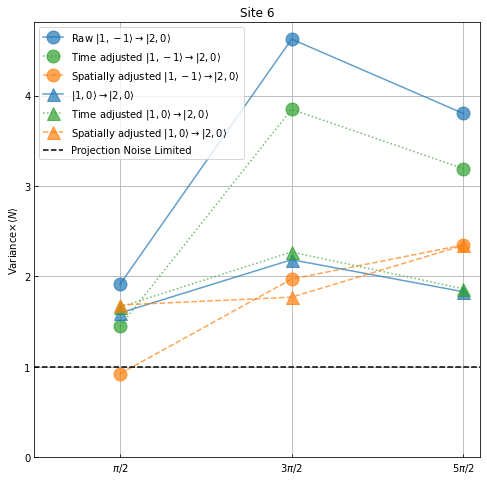

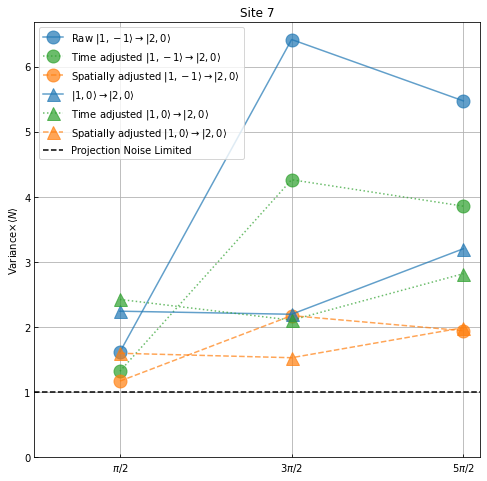

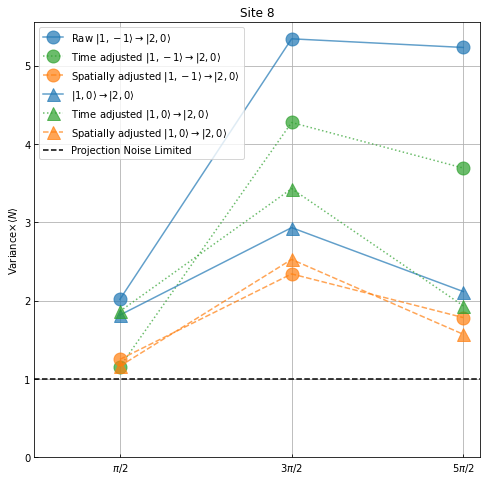

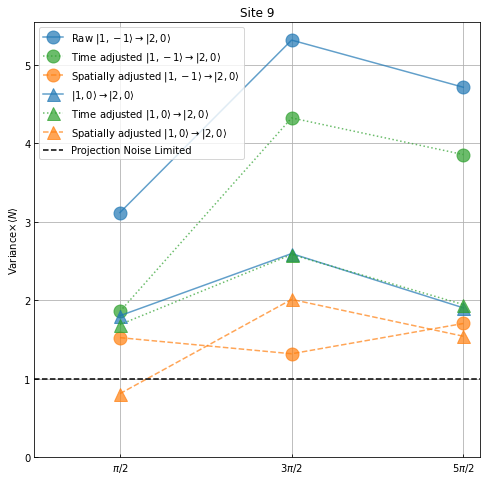

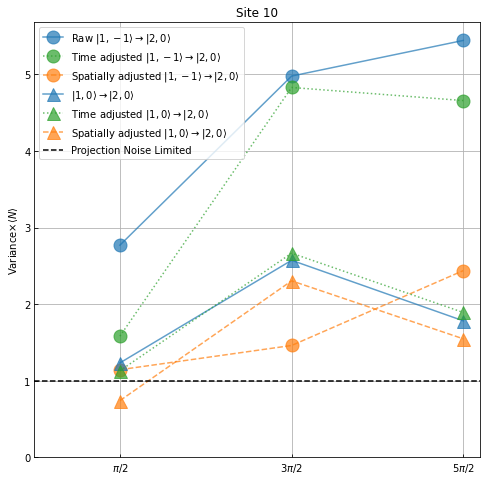

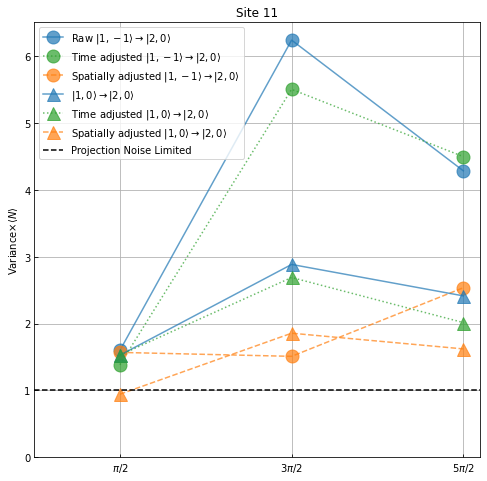

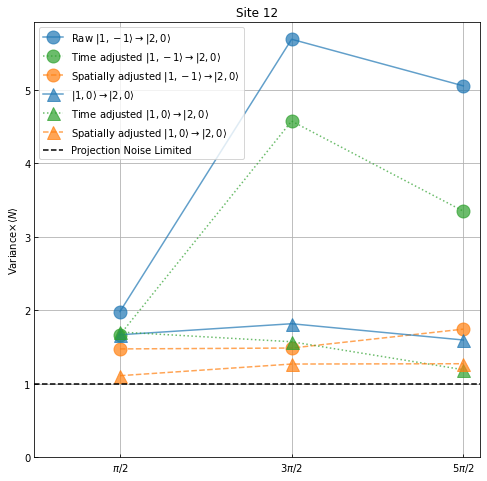

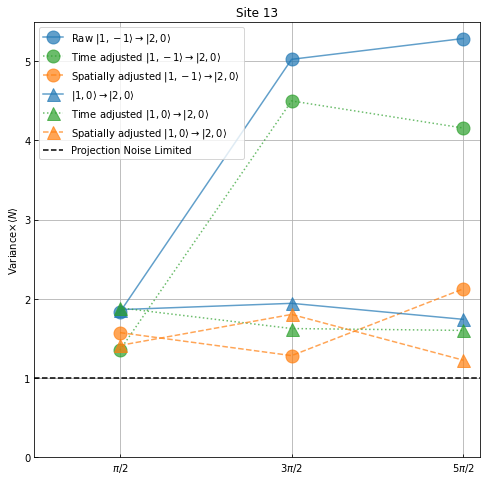

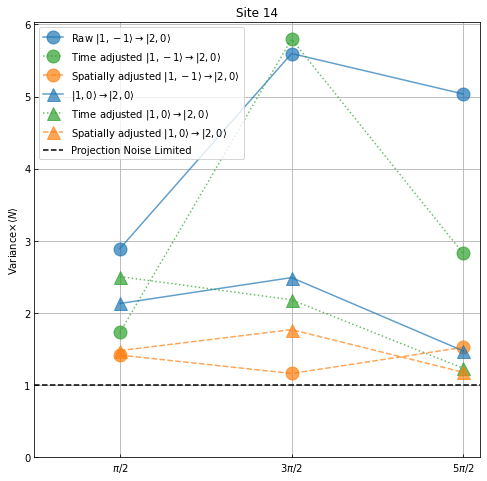

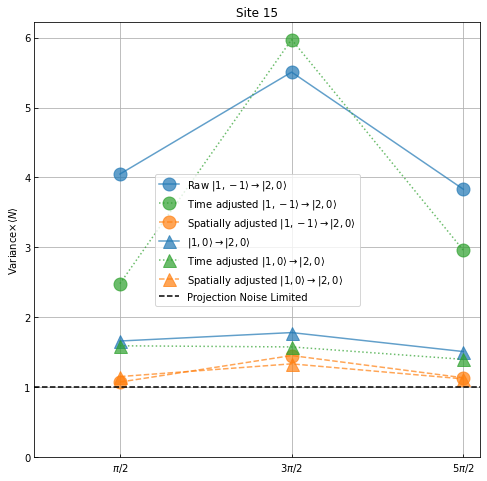

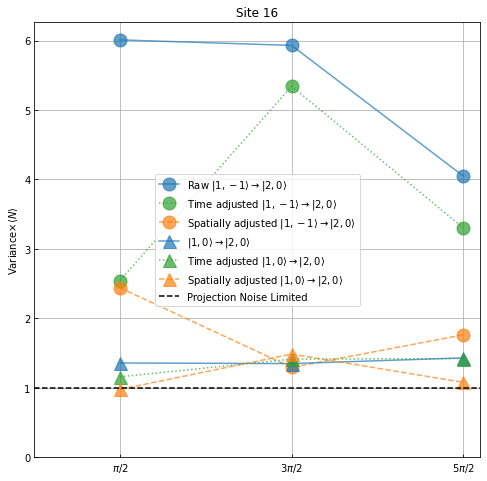

In [ ]:
for site in np.arange(17):
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.set_title(f"Site {site}")
    ax.plot(durations_m1, var_m1[:, site], 'o', 
        label = r"Raw $|1, -1\rangle \rightarrow |2, 0\rangle$",
        ms = 13, alpha = 0.7, c = "tab:blue", ls = '-')
    ax.plot(durations_m1, adj_var_m1[:, site], 'o', 
        label = r"Time adjusted $|1, -1\rangle \rightarrow |2, 0\rangle$",
        ms = 13, alpha = 0.7, c = "tab:green", ls = ':')
    
    ax.plot(durations_m1, diff_var_m1[:, site], 'o', 
        label = r"Spatially adjusted $|1, -1\rangle \rightarrow |2, 0\rangle$",
        ms = 13, alpha = 0.7, c = "tab:orange", ls = '--')
    
    ax.plot(durations_0, var_0[:, site], 'o', 
        label = r"$|1, 0\rangle \rightarrow |2, 0\rangle$",
        c = "tab:blue", 
        ms = 13, alpha = 0.7, marker = '^', ls = '-')
    ax.plot(durations_0, adj_var_0[:, site], 'o', 
        label = r"Time adjusted $|1, 0\rangle \rightarrow |2, 0\rangle$",
        c = "tab:green", 
        ms = 13, alpha = 0.7, marker = '^', ls = ':')
    ax.plot(durations_0, diff_var_0[:, site], 'o', 
        label = r"Spatially adjusted $|1, 0\rangle \rightarrow |2, 0\rangle$",
        c = "tab:orange", 
        ms = 13, alpha = 0.7, marker = '^', ls = '--')
    
    ax.set_ylim(0, None)
    ax.set_xlim(0, None)
    ax.set_xticks([pi/2, 3 * pi / 2, 5 * pi/2])
    ax.set_xticklabels([r"$\pi/2$", r"$3\pi/2$", "$5\pi/2$"])
    ax.axhline(1, label = "Projection Noise Limited", c = "k", ls = '--')
    ax.legend(loc = "best")
    ax.set_ylabel(r"Variance$\times\langle N\rangle$")
    fig.savefig(f"2020-11-09-microwave_comp_{site}.png", dpi = 200)

# Detection Compensation

In [ ]:
pi = np.pi
cos = np.cos
sin = np.sin

m_label = r"$\vert 1, -1\rangle$"
p_label = r"$\vert 1, 1\rangle$"
z_label = r"$\vert 1, 0\rangle$"

fz_label = r"$F_z$"
qzz_label = r"$Q_{zz}$"
ntot_label = r"$N_{tot}$"

def get_statistics(directory, normalized = False):
    fits = np.load(f"{directory}/all_fits.npy")
    labels = list(np.load(f"{directory}/roi_labels.npy"))
    ### fits has shape shots X roi X site
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
    return np.array([m, p, z])

def get_duration(folder):
    s = folder.split("Duration")[-1]
    t = s.split("us")[0]
    return float(t)

def get_sorted_times_folders(folders):
    durations = np.array([get_duration(folder) for folder in folders])
    order = np.argsort(durations)
    durations = durations[order]
    folders = np.array(folders)[order]
    return durations, folders

def convert_params(params):
    """
    Helper function for converting array or fit parameters into useful values
    for fitting.

    Input:
        params - array of length 11
    
    Output:
        omega - float
        delta - float
        imaging matrix - 3 x 3 matrix for states
    """
    assert(len(params) == 11)

    return params[0], params[1], np.reshape(params[2:], (3, 3))


    values = np.array([load_dir(directory) for directory in folders])
    total = np.sum(values, axis = 1)
    pol = (values[:, 1] - values[:, 0])/total
    fig, ax = plt.subplots()
    cax = ax.imshow(pol, cmap = cm.coolwarm, vmin = -1, vmax = 1)
    ax.set_xlabel("Site Index")
    ax.set_ylabel("Duration")
    fig.colorbar(cax)
    yt = ax.get_yticks()
    ax.set_yticklabels(yt * np.max(durations)/np.max(yt))
    fig.savefig("example_pol.png", dpi = 200)
    def rabi_params(t, pol, plot = False):
        guess = [0.05, 0.001]
        if plot:
            fig, ax = plt.subplots()
            ax.plot(t, pol, 'o')
            ax.plot(t, polarization(t, *guess))
        popt, _ = curve_fit(polarization, t, pol, p0 = guess)
        if plot:
            ax.plot(t, polarization(t, *popt))
        return popt
    
    omegas, deltas = zip(*[rabi_params(durations, pol[:, i], plot = False) for i in np.arange(pol.shape[1])])
    deltas = np.abs(deltas)
    fig, ax = plt.subplots()
    ax.plot(omegas)
    ax1 = ax.twinx()
    ax1.plot(deltas, c = "tab:green")
    return np.array(omegas), np.array(deltas)

# Goofbox

In [ ]:
def zero(t, omega_0, delta):
    omega = np.sqrt(delta**2 + omega_0**2)
    theta = omega * t
    z = (delta**2 * omega_0**2/(omega**4) * 2 * np.sin(theta/2)**4
        + omega_0**2/(2 * omega**2) * sin(theta)**2)
    return z
 
def plus(t, omega_0, delta):
    omega = np.sqrt(delta**2 + omega_0**2)
    theta = omega * t
    p = omega_0 **4/omega**4 * sin(theta/2)**4
    return p

def minus(t, omega_0, delta):
    return 1 - zero(t, omega_0, delta) - plus(t, omega_0, delta)

def p(zero):
    return 1/2 * (1 - zero  + np.sqrt(1 - 2 * zero))

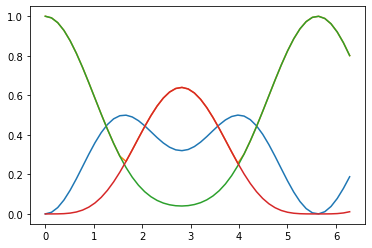

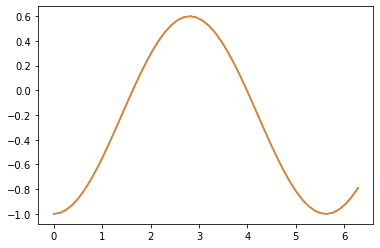

In [ ]:
pi = np.pi
sin = np.sin
cos = np.cos
t = np.linspace(0, 2 * pi)
omega = 1
delta = 0.5
z = zero(t, omega, delta)
fig, ax = plt.subplots()
ax.plot(t, z)
ax.plot(t, p(z))
ax.plot(t, minus(t, omega, delta))
ax.plot(t, plus(t, omega, delta))
fig, ax = plt.subplots()
ax.plot(t, plus(t, omega, delta) - minus(t, omega, delta))
ax.plot(t, 2 * np.sqrt(plus(t, omega, delta)) - 1)

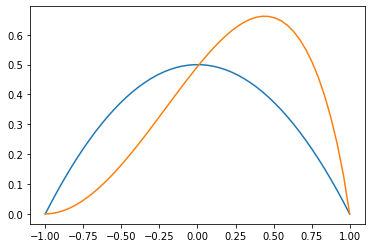

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def p0(pol):
    return 1/2 * (1 - pol**2)
pol = np.linspace(-1, 1)
fig, ax=  plt.subplots()
ax.plot(pol, p0(pol))
ax.plot(pol, 4 * (1 - pol**2) * 0.05 * np.arccos(-pol)**2)

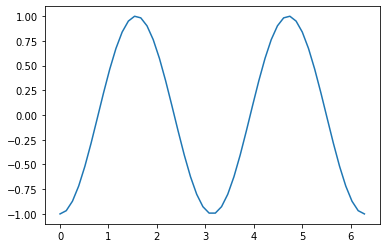

In [ ]:
fig, ax = plt.subplots()
theta = np.linspace(0, 2 *np.pi)
ax.plot(theta, np.sin(theta)**2 - np.cos(theta)**2)